`Дисциплина: Методы и технологии машинного обучения`   
`Уровень подготовки: бакалавриат`   
`Направление подготовки: 01.03.02 Прикладная математика и информатика`   
`Семестр: осень 2021/2022`   




# Лабораторная работа №1: Оценка точности модели с непрерывной зависимой переменной

В практических примерах ниже показано:   

* как делить данные на выборки (обучающую и тестовую);  
* как считать MSE: среднеквадратическую ошибку модели;  
* как меняются MSE на тестовой и обучающей выборках с изменением гибкости (числа степеней свободы) модели.  

*Модели*: сглаживающие сплайны.   
*Данные*: сгенерированные.   

Рассмотрим пример из лекции: как меняется поведение ошибок на тестовой и обучающей выборках при различном числе степеней свободы, если функция зависимости отклика $Y$ от единственного признака $X$ известна. Сгенерируем $X$ и $Y$:

* $X \sim U(5, 105)$   
* $Y = f(X) + \epsilon$, где $f(X) = 4 - 0.02X + 0.0055X^2 - 4.9 \cdot 10^{-5} \cdot X^3$; $\epsilon \sim N(0, 1)$.  


### Генерируем исходные данные

In [31]:
# загрузка пакетов
import numpy as np
import random

In [32]:
# задаём ядро генератора случайных чисел (внимание: не глобально)


# всего наблюдений, доля обучающей выборки
n_all, train_percent = 

# параметры распределения X
x_min, x_max = 

# генерируем X
x = 

# генерируем случайный шум
mu, sigma = 
res = 

# отбираем наблюдения в обучающую выборку
in_train = 

# истинная функция взаимосвязи
def y_func (x) :
    return(4 - 2e-02*x + 5.5e-03*x**2 - 4.9e-05*x**3)
    
# для графика истинной взаимосвязи
x_line = 
y_line = 

# фактические значения y (с шумом)
y = 

# создаём векторы с данными для построения графиков
# наблюдения на обучающей выборке
x_train = 
y_train = 

# наблюдения на тестовой выборке
x_test = 
y_test = 



### Строим графики   

Изобразим исходные данные на графике.   

In [33]:
# загрузка пакетов
import matplotlib.pyplot as plt

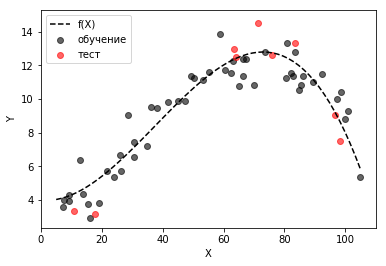

In [34]:
# график 1: исходные данные
#  обучающая выборка

#  тестовая выборка

#  истинная функция взаимосвязи

#  подписи осей


#  легенда



## Обучаем модели и оцениваем их точность

В качестве модели используем сплайны со степенями свободы от 2 (прямая) до 40 (количество узлов равно 2/3 наблюдений). Строим модели с различным количеством степеней свободы и в каждом случае считаем среднеквадратическую ошибку модели на обучающей и тестовой выборках.    

In [35]:
# загрузка пакетов
from pandas import DataFrame
import rpy2.robjects as robjects

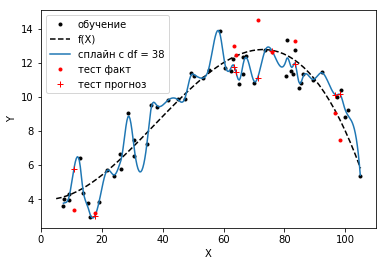

In [36]:
# модель натурального сплайна с заданным количеством узлов (df)
my_df = 

# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
x_sorted_index = 

# равноотстоящие координаты по X для прорисовки сглаженной кривой
x_train_lin = np.linspace(min(x_train), max(x_train), num=300, endpoint=True)

# создаём из данных объекты, понятные R
r_x = robjects.FloatVector(x_train)
r_y = robjects.FloatVector(y_train)

# импортируем нужную функцию из R
r_smooth_spline = robjects.r['smooth.spline']

# строим сглаживающий сплайн
fit = r_smooth_spline(x=r_x, y=r_y, df=my_df)

# делаем прогнозы
y_hat_train = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train)).rx2('y'))
y_hat_test = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_test)).rx2('y'))
y_lin_plot = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train_lin)).rx2('y'))

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
plt.plot(x_train_lin, y_lin_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')

# считаем MSE
MSE_fit = 

Ошибки на обучающей и тестовой выборках составили соответственно:

In [37]:
# выводим MSE с округлением


array([0.11, 3.32])

In [38]:
#  Теперь строим модели с df от 2 до 40 ########################################

# максимальное число степеней свободы для модели сплайна
max_df = 

# фрейм данных для сохранения MSE на обучающей и на тестовой 
#  при разных степенях свободы
MSE_all_dfs = 
MSE_all_dfs = 

# заполняем фрейм
for i_df in range(2, max_df+1) :
    
    # обучаем модель
    fit = 
    
    # прогноз на обучающей выборке
    y_train_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_train)).rx2('y'))
    # прогноз на тестовой выборке
    y_test_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_test)).rx2('y'))
    
    # считаем MSE
    MSE_all_dfs.loc[i_df, 'MSE_train'] = 
    MSE_all_dfs.loc[i_df, 'MSE_test'] = 

Минимум MSE на тестовой выборке достигается при числе степеней свободы:  

In [39]:
# фильтруем таблицу по минимальной MSE на тестовой выборке


,MSE_train,MSE_test
6,0.805512,1.914443


Изобразим на графике динамику MSE на обучающей и тестовой выборках в зависимости от степеней свободы модели. 

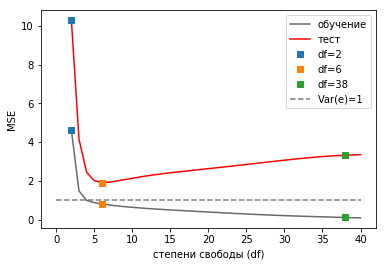

In [40]:
# график изменения MSE с увеличением df
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_train'], color='dimgrey', 
         marker='', label='обучение')
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_test'], color='red', 
         marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs.iloc[0]['MSE_train'], MSE_all_dfs.iloc[0]['MSE_test']],
         ls='', marker='s', label='df=2')
plt.plot([6, 6], [MSE_all_dfs.iloc[4]['MSE_train'], MSE_all_dfs.iloc[4]['MSE_test']],
         ls='', marker='s', label='df=6')
plt.plot([38, 38], [MSE_all_dfs.iloc[36]['MSE_train'], MSE_all_dfs.iloc[36]['MSE_test']],
         ls='', marker='s', label='df=38')
plt.hlines(1, 0, 40, linestyles='dashed', color='grey', label='Var(e)=1')
#  подписи осей
plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')
# легенда
plt.legend(loc='best')

Кривая MSE на обучающей выборке стабильно снижается с ростом узлов сплайна. Чем больше наблюдений, через которые прошёл сплайн, тем точнее модель. Это говорит о переобучении. Лучшую модель следуют выбирать по минимуму на кривой MSE на тестовой выборке.  